<a href="https://colab.research.google.com/github/DIPANJAN001/Dipanjanpatra/blob/master/PVx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
df=pd.read_excel("/content/pv_04.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [107]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	17
Rejected: 	23
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	16
Rejected: 	23
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	15
R

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=141,
                                         random_state=RandomState(MT19937) at 0x7F85BB7E9490),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F85BB7E9490, verbose=2)

In [108]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [109]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 3
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.4, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)

In [110]:
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [111]:
from keras.layers import Bidirectional
from keras import layers

In [ ]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
57/57 [==============================] - 30s 29ms/step - loss: 0.0217 - root_mean_squared_error: 0.1473
Epoch 2/200
57/57 [==============================] - 2s 32ms/step - loss: 0.0131 - root_mean_squared_error: 0.1145
Epoch 3/200
57/57 [==============================] - 2s 33ms/step - loss: 0.0075 - root_mean_squared_error: 0.0867
Epoch 4/200
57/57 [==============================] - 2s 31ms/step - loss: 0.0055 - root_mean_squared_error: 0.0740
Epoch 5/200
57/57 [==============================] - 2s 31ms/step - loss: 0.0050 - root_mean_squared_error: 0.0709
Epoch 6/200
57/57 [==============================] - 2s 32ms/step - loss: 0.0045 - root_mean_squared_error: 0.0669
Epoch 7/200
57/57 [==============================] - 2s 29ms/step - loss: 0.0041 - root_mean_squared_error: 0.0640
Epoch 8/200
57/57 [==============================] - 2s 31ms/step - loss: 0.0038 - root_mean_squared_error: 0.0618
Epoch 9/200
57/57 [==============================] - 2s 29ms/step - loss: 0.003

In [159]:
y_en_=ensemble_model.predict(X_test)
plt.scatter(y_en_,y_test)
plt.show()

InvalidArgumentError: ignored

In [ ]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en_))]
df_['Actual']=y_test
df_['Predicted']=y_en_

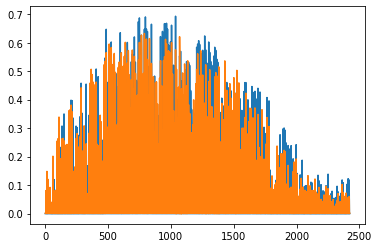

In [151]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()

In [ ]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
#model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
#y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1,y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train, y_train, epochs = 200, batch_size = 64)

In [ ]:
y_en=ensemble_model.predict(X_test)
plt.scatter(y_en,y_test)
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [ ]:
df_ = pd.DataFrame()

In [152]:
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test
df_['Predicted']=y_en
df_['Predicted1']=y_en_

In [ ]:
df__= pd.DataFrame()

In [ ]:
df__['time']=[i for i in range(len(solpow))]
df__['power']=solpow

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:

fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x=df_.reset_index()['time'], y=df_.reset_index()['Actual'],name='Actual generated solar power'),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=df_.reset_index()['time'], y=df_.reset_index()['Predicted'],name='Predicted generated solar power LSTM '),row=1,col=1
)
fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="SolarPower")

fig.show()

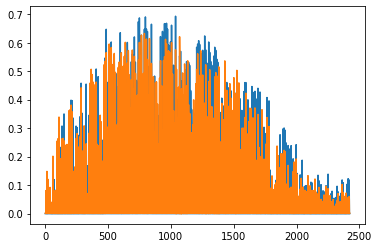

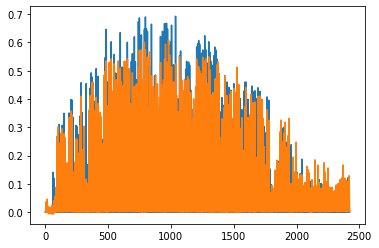

In [158]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted1'])

plt.show()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [ ]:
n_inputs=weather_input.shape[1]

In [ ]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [ ]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [ ]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

In [ ]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [ ]:
solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

In [ ]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

In [ ]:
num_steps = 3
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [ ]:
inputs1=Input(shape=(X_train1.shape[1],X_train1.shape[2]))

In [ ]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train1, y_train1, epochs = 200, batch_size = 64)

76/76 [==============================] - 1s 8ms/step


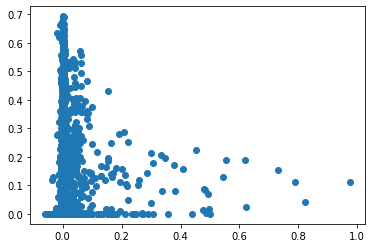

In [157]:
y_en=ensemble_model.predict(X_test1)
plt.scatter(y_en,y_test1)
plt.show()

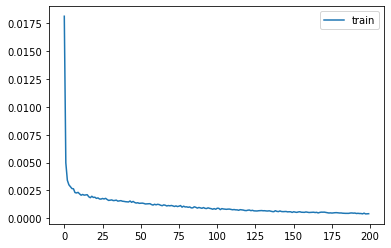

In [156]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [ ]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test
df_['Predicted']=y_en

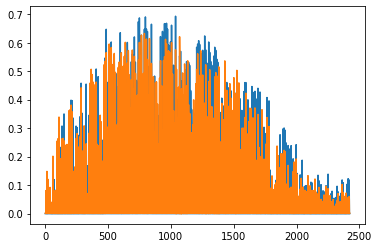

In [153]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()

In [ ]:
from sklearn.decomposition import PCA 

In [ ]:
pca = PCA(n_components = 20)
pca.fit(weather_input)
data_pca = pca.transform(weather_input)
data_pca = pd.DataFrame(data_pca)

In [ ]:
data_pca.head()

In [ ]:
num_steps = 3
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(data_pca,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [ ]:
X_train2, X_test2, y_train2, y_test2= train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [ ]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train2, y_train2, epochs = 200, batch_size = 64)

76/76 [==============================] - 1s 8ms/step


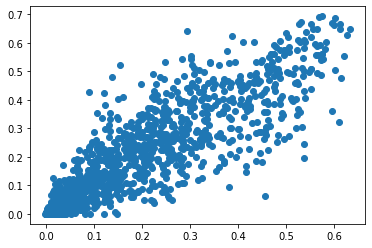

In [155]:
y_en=ensemble_model.predict(X_test2)
plt.scatter(y_en,y_test2)
plt.show()

In [ ]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test2
df_['Predicted']=y_en

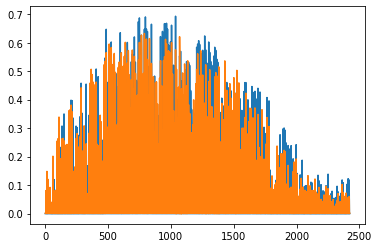

In [154]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()